In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.utils import check_random_state
from sklearn.metrics import roc_curve

hosp_data=pd.read_csv('data-FPBfZ.csv')
fata_rate_data=pd.read_csv('us-states.csv')

In [2]:
df_hosp = hosp_data.groupby(['State']).sum()
df_hosp.iloc[:,3] = df_hosp.iloc[:,2]/df_hosp.iloc[:,1]
df_hosp.iloc[:,4] = df_hosp.iloc[:,2]/df_hosp.iloc[:,0]
# df_hosp['Percent of Population Aged 60+']=df_hosp['Population Aged 60+']/df_hosp['Total Population']
# df_hosp['Residents Aged 60+ Per Each ICU Bed']=df_hosp['Population Aged 60+']/df_hosp['ICU Beds']

In [5]:
# temp = fata_rate_data.iloc[:,0]
# dates,index = np.unique(temp, return_index=True)
# time_series=[]
# for date in dates:
#     df_fatal = fata_rate_data.groupby('date').get_group(date)
#     df_fatal.set_index(['state'], inplace=True)
#     death = df_fatal['deaths']/df_fatal['cases']
#     if death.size>=50:
#         time_series = [time_series,death]
# time_series.to_csv('times_series.csv')
# # time_series
df_fatal = fata_rate_data.groupby('date').get_group('2020-04-27')
del df_fatal['date']
del df_fatal['fips']
df_fatal.set_index(['state'], inplace=True)
df_fatal['death'] = df_fatal['deaths']/df_fatal['cases']
df_fatal

/Users/Leontanaka/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,cases,deaths,death
state,,,
Alabama,6539,228,0.034868
Alaska,343,7,0.020408
Arizona,6716,277,0.041245
Arkansas,3069,51,0.016618
California,45208,1800,0.039816
Colorado,13804,705,0.051072
Connecticut,25997,2012,0.077394
Delaware,4162,125,0.030034
District of Columbia,3892,185,0.047533


In [6]:
# death.size

NameError: name 'death' is not defined

In [7]:
all_data=pd.concat([df_hosp,df_fatal],axis=1)
all_data = all_data.drop(labels = ['Guam','Northern Mariana Islands','Puerto Rico','Virgin Islands'])
final_data=all_data.rename(columns={"death": "fatal_rate"})
final_data.to_csv('old_grouped_data.csv')

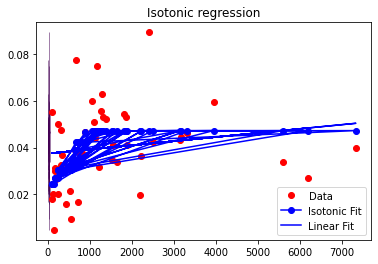

In [8]:
# x = final_data[['ICU Beds','Total Population','Population Aged 60+']]
x = final_data['ICU Beds']
y = final_data['fatal_rate']

n = 51
# #############################################################################
# Fit IsotonicRegression and LinearRegression models

ir = IsotonicRegression()

y_ = ir.fit_transform(x, y)

lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  # x needs to be 2d for LinearRegression
# lr.fit(x, y)  # x needs to be 2d for LinearRegression

# #############################################################################
# Plot result

segments = [[[i, y[i]], [i, y_[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(np.full(n, 0.5))

fig = plt.figure()
plt.plot(x, y, 'r.', markersize=12)
plt.plot(x, y_, 'b.-', markersize=12)
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.gca().add_collection(lc)
plt.legend(('Data', 'Isotonic Fit', 'Linear Fit'), loc='lower right')
plt.title('Isotonic regression')
plt.show()

In [9]:
x = final_data[['ICU Beds','Percent of Population Aged 60+','Residents Aged 60+ Per Each ICU Bed']]
y = final_data['fatal_rate']
lr = linear_model.LinearRegression()
lr.fit(x,y)
print(lr.coef_)

[ 1.82706854e-06  1.43087567e-01 -4.87290895e-06]


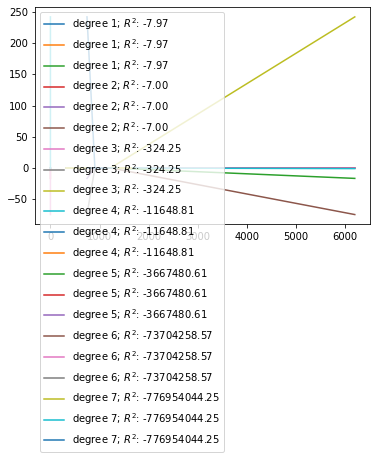

In [10]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
x = final_data[['ICU Beds','Percent of Population Aged 60+','Residents Aged 60+ Per Each ICU Bed']]
# x = final_data[['ICU Beds','Percent of Population Aged 60+']]
# x = final_data[['Percent of Population Aged 60+','Residents Aged 60+ Per Each ICU Bed']]
# x = final_data[['Residents Aged 60+ Per Each ICU Bed']]
# x = final_data[['ICU Beds','Total Population']]
# x = final_data[['ICU Beds']]
y = final_data['fatal_rate']
x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(x,y,test_size=0.10, 
                                                                          random_state=42,
                                                                          shuffle=True)
# Polynomial Regression-nth order
# plt.scatter(x_test_set, y_test_set, s=10, alpha=0.3)

for degree in [1,2,3,4,5,6,7]:

    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    model.fit(x_training_set,y_training_set)

    a = model.get_params
    
#     print(a)
    
    y_plot = model.predict(x_test_set)

    plt.plot(x_test_set, y_plot, label="degree %d" % degree

             +'; $R^2$: %.2f' % model.score(x_test_set, y_test_set))
#     plt.plot(x_test_set, y_plot, '*')


plt.legend(loc='upper left')

# plt.xlabel("")

# plt.ylabel("")

# plt.title("")

plt.show()


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm

# x = final_data['ICU Beds']
# # y = final_data['Total Population']
# y = final_data['Percent of Population Aged 60+']
# X, Y = np.meshgrid(x, y)

# Z = final_data['fatal_rate']
# V = final_data['Total Population']

# create the figure, add a 3d axis, set the viewing angle
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.view_init(45,60)

# here we create the surface plot, but pass V through a colormap
# to create a different color for each patch
# ax.plot_surface(X, Y, Z, facecolors=cm.Oranges(V))
# ax.plot_surface(X, Y, Z)

In [ ]:
x = final_data['ICU Beds']
y = final_data['fatal_rate']
plt.plot(x,y,'*')

In [ ]:
dir(a)


In [ ]:
fata_rate_data.groupby('date').all

In [ ]:
temp = fata_rate_data.iloc[:,0]
u,index = np.unique(temp, return_index=True)
u